In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_excel('/private/wuchenpeng/projects/high-molecular/data/1_聚合反应更新数据.xlsx')
# data = pd.read_excel('/private/wuchenpeng/projects/high-molecular/data/副本新数据.xlsx')
# data = pd.read_excel('/private/wuchenpeng/projects/high-molecular/data/1_聚合反应更新数据 - 加入新数据.xlsx')
data.columns = data.iloc[0]
data = data.drop(0)

In [3]:
data

,redox,azo,fe,ybc,温度,浓度,AMPS,[n],转化率（%）
1,0,0,0,0,0,15,10,0,0
2,0.0001,0.0001,0.5,0.0001,5,15,10,0,0
3,0.001,0.001,1,0.001,10,15,10,1120,71
4,0.01,0.01,1.5,0.01,15,15,10,1385,80
5,0.1,0.1,2,0.1,20,15,10,240,100
...,...,...,...,...,...,...,...,...,...
192,0,0.012,0,0,50,16,0,1166,98
193,0,0.0045,0,0,56,19,0,1257,97
194,0,0.007,0,0,53,19,0,1340,98
195,0,0.0095,0,0,50,19,0,1251,96


类型转化

In [4]:
data = data.astype('float64')

log处理

In [5]:
columns_to_transform = ['redox', 'azo', 'ybc']

In [6]:
epsilon = 1e-5
data[columns_to_transform] = data[columns_to_transform].applymap(lambda x: np.abs(np.log10(x + epsilon)))

In [7]:
data

,redox,azo,fe,ybc,温度,浓度,AMPS,[n],转化率（%）
1,5.000000,5.000000,0.0,5.000000,0.0,15.0,10.0,0.0,0.0
2,3.958607,3.958607,0.5,3.958607,5.0,15.0,10.0,0.0,0.0
3,2.995679,2.995679,1.0,2.995679,10.0,15.0,10.0,1120.0,71.0
4,1.999566,1.999566,1.5,1.999566,15.0,15.0,10.0,1385.0,80.0
5,0.999957,0.999957,2.0,0.999957,20.0,15.0,10.0,240.0,100.0
...,...,...,...,...,...,...,...,...,...
192,5.000000,1.920457,0.0,5.000000,50.0,16.0,0.0,1166.0,98.0
193,5.000000,2.345823,0.0,5.000000,56.0,19.0,0.0,1257.0,97.0
194,5.000000,2.154282,0.0,5.000000,53.0,19.0,0.0,1340.0,98.0
195,5.000000,2.021819,0.0,5.000000,50.0,19.0,0.0,1251.0,96.0


In [8]:
# data.to_excel('/private/wuchenpeng/projects/high-molecular/data/dup_log_new_test.xlsx', index=False)
# data.to_excel('/private/wuchenpeng/projects/high-molecular/data/dup_log.xlsx', index=False)

In [72]:
data.columns

Index(['redox', 'azo', 'fe', 'ybc', '温度', '浓度', 'AMPS', '[n]', '转化率（%）'], dtype='object', name=0)

In [73]:
columns_to_print = ['redox', 'azo', 'fe', 'ybc', '温度', '浓度', 'AMPS', '[n]', '转化率（%）']

/private/wuchenpeng/anaconda3/envs/DL/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from current font.
  fig.canvas.draw()
/private/wuchenpeng/anaconda3/envs/DL/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.draw()
/private/wuchenpeng/anaconda3/envs/DL/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 27987 (\N{CJK UNIFIED IDEOGRAPH-6D53}) missing from current font.
  fig.canvas.draw()
/private/wuchenpeng/anaconda3/envs/DL/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 36716 (\N{CJK UNIFIED IDEOGRAPH-8F6C}) missing from current font.
  fig.canvas.draw()
/private/wuchenpeng/anaconda3/envs/DL/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  fig.canvas.draw()
/private/wuchenpeng/anaconda3/envs/

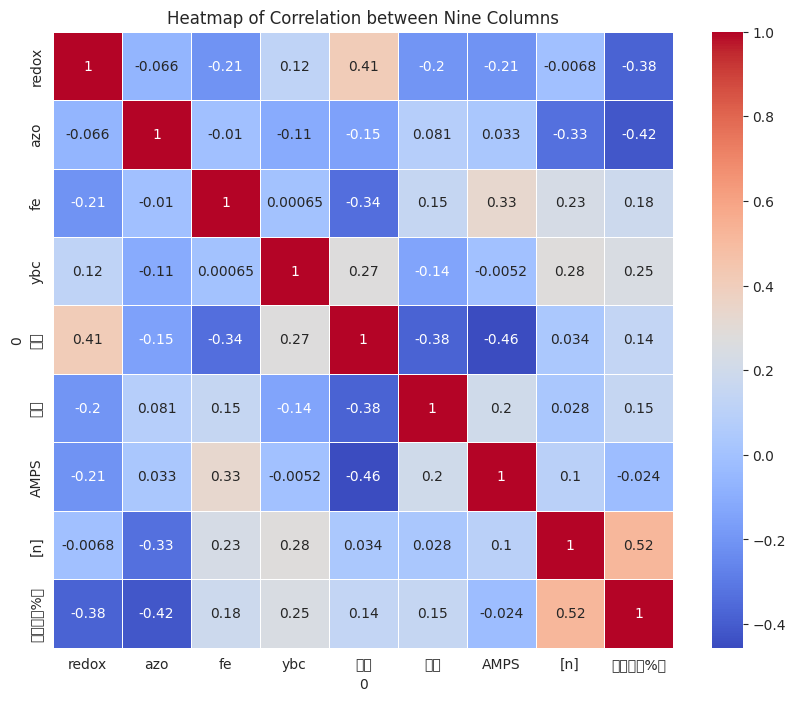

In [74]:
# corr_matrix = data[columns_to_print].corr()
# 
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title("Heatmap of Correlation between Nine Columns")
# plt.show()



PCA

In [45]:
columns_to_combine = ['redox', 'azo', 'fe', 'ybc', '温度', '浓度', 'AMPS']
columns_to_combine1 = ['redox', 'azo', 'ybc']
columns_to_combine2 = ['fe', '温度', '浓度', 'AMPS']

In [46]:
pca = PCA(n_components=1)
data['combined_feature'] = pca.fit_transform(data[columns_to_combine])
data['combined_feature1'] = pca.fit_transform(data[columns_to_combine1])
data['combined_feature2'] = pca.fit_transform(data[columns_to_combine2])

In [47]:
data

,redox,azo,fe,ybc,温度,浓度,AMPS,[n],转化率（%）,combined_feature,combined_feature1,combined_feature2
1,5.000000,5.000000,0.0,5.000000,0.0,15.0,10.0,0.0,0.0,-20.659090,0.963336,-20.675750
2,3.958607,3.958607,0.5,3.958607,5.0,15.0,10.0,0.0,0.0,-20.998902,0.343249,-21.006466
3,2.995679,2.995679,1.0,2.995679,10.0,15.0,10.0,1120.0,71.0,-21.338038,-0.230117,-21.337182
4,1.999566,1.999566,1.5,1.999566,15.0,15.0,10.0,1385.0,80.0,-21.677460,-0.823243,-21.667898
5,0.999957,0.999957,2.0,0.999957,20.0,15.0,10.0,240.0,100.0,-22.016913,-1.418451,-21.998614
...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.995679,2.396856,1.0,5.000000,5.0,25.0,50.0,1925.3,96.8,18.927841,1.836829,18.900651
174,2.995679,2.521434,1.0,5.000000,5.0,25.0,50.0,1902.0,96.3,18.927143,1.808653,18.900651
175,2.995679,2.396856,2.0,5.000000,5.0,25.0,75.0,1705.0,98.2,43.881567,1.836829,43.857549
176,2.995679,2.396856,2.0,5.000000,5.0,25.0,100.0,1386.0,99.9,68.815215,1.836829,68.794379


In [32]:
df = data.iloc[:, -5:]

In [33]:
df

,[n],转化率（%）,combined_feature,combined_feature1,combined_feature2
1,0.000000,0.0,-11.148454,1.638262,-11.117776
2,0.000000,0.0,-13.521996,0.596038,-13.514072
3,1120.000000,71.0,-15.897362,-0.367659,-15.910369
4,1385.000000,80.0,-18.271956,-1.364566,-18.306665
5,240.000000,100.0,-20.646470,-2.364973,-20.702962
...,...,...,...,...,...
192,1166.449073,98.0,-43.834134,2.484077,-43.778552
193,1256.825022,97.0,-46.391587,2.367247,-46.336620
194,1339.660705,98.0,-44.946829,2.419855,-44.891781
195,1251.149820,96.0,-43.501779,2.456237,-43.446942


In [34]:
columns_to_print2 = ['[n]', '转化率（%）', 'combined_feature', 'combined_feature1', 'combined_feature2']

/private/wuchenpeng/anaconda3/envs/DL/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 36716 (\N{CJK UNIFIED IDEOGRAPH-8F6C}) missing from current font.
  fig.canvas.draw()
/private/wuchenpeng/anaconda3/envs/DL/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  fig.canvas.draw()
/private/wuchenpeng/anaconda3/envs/DL/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.draw()
/private/wuchenpeng/anaconda3/envs/DL/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.draw()
/private/wuchenpeng/anaconda3/envs/DL/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.draw()
/private/wuchenpeng/anaconda3/envs

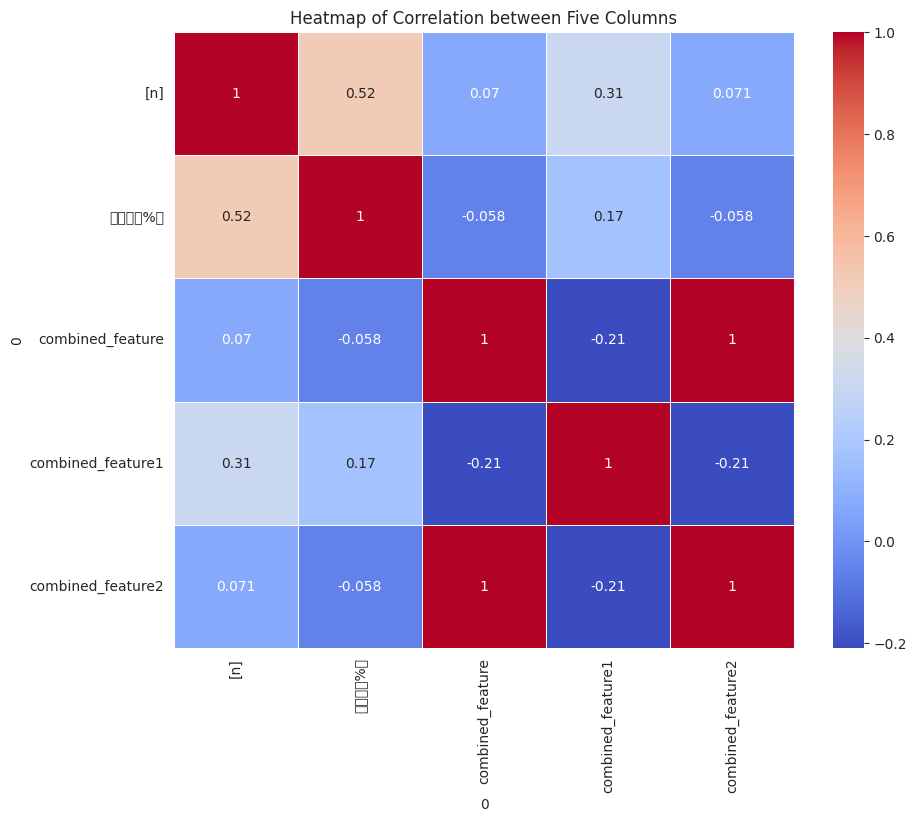

In [35]:
corr_matrix2 = df[columns_to_print2].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Correlation between Five Columns")
plt.show()

In [36]:
data.astype('float64')

,redox,azo,fe,ybc,温度,浓度,AMPS,[n],转化率（%）,combined_feature,combined_feature1,combined_feature2
1,5.000000,5.000000,0.0,5.000000,0.0,15.0,10.0,0.000000,0.0,-11.148454,1.638262,-11.117776
2,3.958607,3.958607,0.5,3.958607,5.0,15.0,10.0,0.000000,0.0,-13.521996,0.596038,-13.514072
3,2.995679,2.995679,1.0,2.995679,10.0,15.0,10.0,1120.000000,71.0,-15.897362,-0.367659,-15.910369
4,1.999566,1.999566,1.5,1.999566,15.0,15.0,10.0,1385.000000,80.0,-18.271956,-1.364566,-18.306665
5,0.999957,0.999957,2.0,0.999957,20.0,15.0,10.0,240.000000,100.0,-20.646470,-2.364973,-20.702962
...,...,...,...,...,...,...,...,...,...,...,...,...
192,5.000000,1.920457,0.0,5.000000,50.0,16.0,0.0,1166.449073,98.0,-43.834134,2.484077,-43.778552
193,5.000000,2.345823,0.0,5.000000,56.0,19.0,0.0,1256.825022,97.0,-46.391587,2.367247,-46.336620
194,5.000000,2.154282,0.0,5.000000,53.0,19.0,0.0,1339.660705,98.0,-44.946829,2.419855,-44.891781
195,5.000000,2.021819,0.0,5.000000,50.0,19.0,0.0,1251.149820,96.0,-43.501779,2.456237,-43.446942


In [37]:
data.to_excel('/private/wuchenpeng/projects/high-molecular/data/test_new_data.xlsx', index=False)